In [208]:
import pandas as pd
from  sympy import *
import math 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

## QUESTION 3: Congestion Measurement:
#### Freeway congestion delay consists of recurrent delay plus the additional (non-recurrent) delay. Recurrent delay arises from traffic demand exceeding the available capacity, fluctuations in traffic demand, as well as the manner in which the freeway is operated. Non-recurrent delay is caused by accidents, breakdowns, debris, and other random events, such as inclement weather. The magnitude of non-recurrent delay depends on the frequency, nature and duration of the event, e.g., an accident blocking travel lanes causes more delay than a vehicle stopped on the shoulder of the highway. 
#### Apply the congestion measurement methodology presented in class1 to obtain estimates of the recurrent and the non-recurrent delay along a freeway section.

## Data
#### The study section is the eastbound direction of a 10 mile segment of I-10 freeway in Los Angeles (CA postmile 21.42 to CA postmile 31.45). There are four travel lanes in the study section. The study period is one week (Monday March 12 through Friday March 15, 2002). The basic data for the analysis have been extracted from the PeMS system. The processed data are uploaded on b-courses (spreadsheet PS1_Q3_data.xls). The format of the data is shown below.

## The columns are:
### 1) Date
### 2) Hour of the day (0: time starting at 0, refers to midnight – 1 am time period)
### 3) Average speed over all detector stations over the hour (mph)
### 4) Average flow over all stations over the hour (v/l/h)
### 5) Total VMT (veh-miles-travelled) over the hour
### 6) Total VHT (veh-hrs-travelled) over the hour
### 7) Number of accidents
### 8) Number of breakdowns

## Analysis
### a) Calculate the total, recurrent and non recurrent delay separately for the peak periods (6-10 am and 3-7 pm) and off-peak periods
#### - Calculate the delay for both 35 and 60 mph reference speeds
#### - Plot the delay distributions and discuss the variability of freeway congestion
#### - Calculate the portion of the non-recurrent delay as a function of total delay (for both reference speeds and analysis periods)

### b) How the above estimates and findings would change if the analysis interval is 2 hours instead of 1 hour
### c) Derive estimates of the average travel time and travel time reliability measures
#### - Use the average speeds over the hour provided in the spreadsheet
#### - What is the impact of incidents on travel times

In [209]:
dataframe = pd.read_excel(r"PS1_Q3_Data.xls")

In [210]:
dataframe.shape

(120, 8)

In [211]:
dataframe.head()

,DATE,HRS,SPEED,FLOW,VMT,VHT,#ACC,#BRK
0,2002-03-11,0,59.6,238.3,12600.7,217.5,0,0
1,2002-03-11,1,60.7,148.9,7800.4,129.0,0,0
2,2002-03-11,2,59.3,131.9,6391.2,115.9,0,0
3,2002-03-11,3,58.1,128.1,5942.2,110.0,0,0
4,2002-03-11,4,58.5,190.3,8893.9,160.2,0,0


In [212]:
for i in dataframe.DATE: 
    print(i)

2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-11 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-12 00:00:00
2002-03-13 00:00:00
2002-03-13 00:00:00


In [213]:
datetime =[]
for i in range(len(dataframe.DATE)):
    datetime.append( (str(dataframe.DATE[i]))[:10] + "-" + str(dataframe.HRS[i]))
dataframe['DATE_TIME'] = datetime
dataframe['DATE_TIME'] = pd.to_datetime(dataframe['DATE_TIME'], format = '%Y-%m-%d-%H')

$$D(s,t) =\Sigma  max\{VHT ( \sigma, \tau)- \frac{VMT(\sigma, \tau)}{V_{r}} , 0\}$$
### VHT: Veh hrs Traveled 
### VMT: Vehicle Miles Traveled
### Vr: Speed Threshold(60 mph or 35 mph)

In [337]:
dataframe['Delay'] = dataframe['VHT'] - dataframe['VMT'] / 60 
#dataframe['Delay'] = dataframe['VHT'] - dataframe['VMT'] / 35 

In [338]:
dataframe['Delay'][dataframe['Delay'] < 0] = 0

C:\Users\mubar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [339]:
Slice1 = dataframe[:24]
Slice2 = dataframe[24:48]
Slice3 = dataframe[48:72]
Slice4 = dataframe[72:96]
Slice5 = dataframe[96:120]

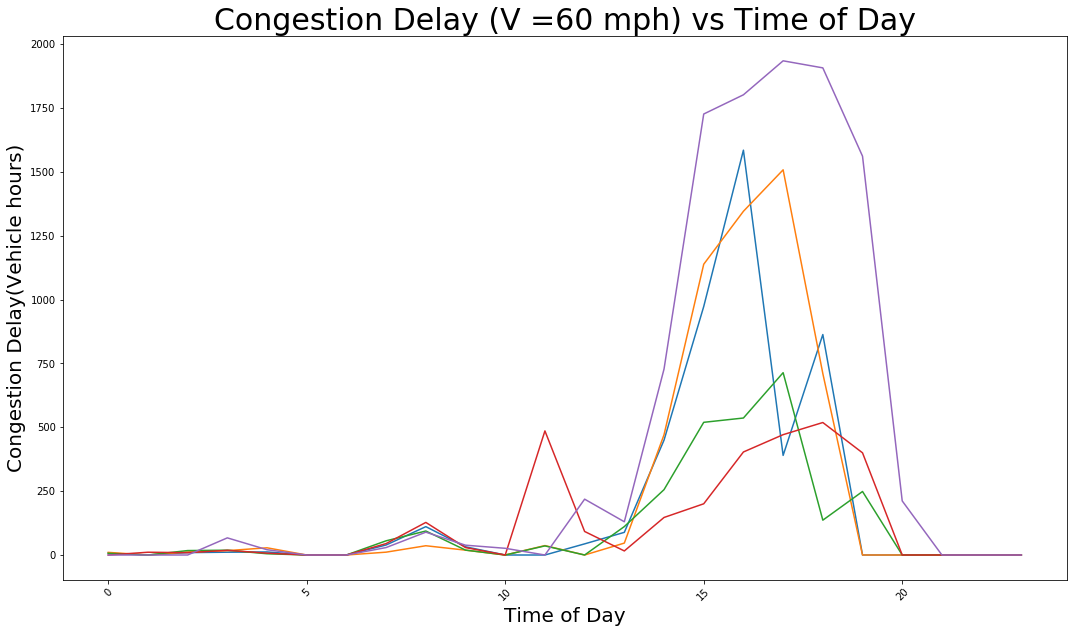

In [340]:
fig, ax = plt.subplots()

plt.plot(Slice1.HRS,Slice1.Delay)
plt.plot(Slice1.HRS,Slice2.Delay)
plt.plot(Slice1.HRS,Slice3.Delay)
plt.plot(Slice1.HRS,Slice4.Delay)
plt.plot(Slice1.HRS,Slice5.Delay)
ax.set_title('Congestion Delay (V =60 mph) vs Time of Day',size = 30)

ax.set_ylabel('Congestion Delay(Vehicle hours)', size = 20)
ax.set_xlabel('Time of Day', size = 20)
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.xticks(rotation=45)



plt.show()

In [341]:
dataframe.head()

,DATE,HRS,SPEED,FLOW,VMT,VHT,#ACC,#BRK,DATE_TIME,Delay,TTI
0,2002-03-11,0,59.6,238.3,12600.7,217.5,0,0,2002-03-11 00:00:00,7.488333,1.090604
1,2002-03-11,1,60.7,148.9,7800.4,129.0,0,0,2002-03-11 01:00:00,0.000000,1.070840
2,2002-03-11,2,59.3,131.9,6391.2,115.9,0,0,2002-03-11 02:00:00,9.380000,1.096121
3,2002-03-11,3,58.1,128.1,5942.2,110.0,0,0,2002-03-11 03:00:00,10.963333,1.118761
4,2002-03-11,4,58.5,190.3,8893.9,160.2,0,0,2002-03-11 04:00:00,11.968333,1.111111


In [342]:
am = dataframe[(dataframe['HRS'] >= 6) & (dataframe['HRS'] <= 9)]
pm = dataframe[(dataframe['HRS'] >= 15) & (dataframe['HRS'] <= 18)]

am_wo_incidents = am[(am['#ACC'] == 0) & (am['#BRK'] == 0) ]
pm_wo_incidents = pm[(pm['#ACC'] == 0) & (pm['#BRK'] == 0) ]

am_w_acc_no_brk = am[(am['#ACC'] != 0)]
pm_w_acc_no_brk = pm[(pm['#ACC'] != 0)]

am_w_brk_no_acc = am[(am['#ACC'] == 0) & (am['#BRK'] != 0) ]
pm_w_brk_no_acc = pm[(pm['#ACC'] == 0) & (pm['#BRK'] != 0) ]

In [343]:
print(am.shape)
print(am_wo_incidents.shape)
print(am_w_acc_no_brk.shape)
print(am_w_brk_no_acc.shape)

(20, 11)
(16, 11)
(2, 11)
(2, 11)


In [344]:
peak = pd.concat([am,pm])
peak_wo_incidents = peak[(peak['#ACC'] == 0) & (peak['#BRK'] == 0) ]
peak_w_acc_no_brk = peak[(peak['#ACC'] != 0)]
peak_w_brk_no_acc = peak[(peak['#ACC'] == 0) & (peak['#BRK'] != 0) ]


print(peak.shape)
print(peak_wo_incidents.shape)
print(peak_w_acc_no_brk.shape)
print(peak_w_brk_no_acc.shape)

total_peak_delay             = peak['Delay'].sum()
recurrent_delay_peak         = peak_wo_incidents['Delay'].sum()
non_recurrent_delay_peak_acc = peak_w_acc_no_brk['Delay'].sum()
non_recurrent_delay_peak_brk = peak_w_brk_no_acc['Delay'].sum()

recurrent_peak_per_hr = recurrent_delay_peak/peak_wo_incidents.shape[0]
non_rec_peak_per_hr_acc = non_recurrent_delay_peak_acc/peak_w_acc_no_brk.shape[0]
non_rec_peak_per_hr_non_acc= non_recurrent_delay_peak_brk/peak_w_brk_no_acc.shape[0]
P_I_is_acc_peak =  peak_w_acc_no_brk.shape[0]/peak.shape[0]
P_I_is_brk_peak = peak_w_brk_no_acc.shape[0]/peak.shape[0]

print('Total peak delay per hour =', total_peak_delay/peak.shape[0])
print('Total Recurrent Peak delay per hour', recurrent_peak_per_hr)
print('Total Non Recurrent Peak delay (accidents) per hour', (non_rec_peak_per_hr_acc- recurrent_peak_per_hr)* P_I_is_acc_peak)
print('Total Non Recurrent AM delay (non_accidents) per hour', (non_rec_peak_per_hr_non_acc -recurrent_peak_per_hr)*P_I_is_brk_peak)


(40, 11)
(26, 11)
(8, 11)
(6, 11)
Total peak delay per hour = 504.0838333333333
Total Recurrent Peak delay per hour 337.5590384615385
Total Non Recurrent Peak delay (accidents) per hour 148.64510897435895
Total Non Recurrent AM delay (non_accidents) per hour 17.87968589743588


In [345]:
off_peak1 = dataframe[(dataframe['HRS'] < 6)]
off_peak2 = dataframe[(dataframe['HRS'] > 9)  & (dataframe['HRS'] < 15) ]
off_peak3 = dataframe[(dataframe['HRS'] > 18) & (dataframe['HRS'] < 25) ]

off_peak = pd.concat([off_peak1,off_peak2, off_peak3])

off_peak_wo_incidents = off_peak[(off_peak['#ACC'] == 0) & (off_peak['#BRK'] == 0) ]
off_peak_w_acc_no_brk = off_peak[(off_peak['#ACC'] != 0)]
off_peak_w_brk_no_acc = off_peak[(off_peak['#ACC'] == 0) & (off_peak['#BRK'] != 0) ]

print(off_peak.shape)
print(off_peak_wo_incidents.shape)
print(off_peak_w_acc_no_brk.shape)
print(off_peak_w_brk_no_acc.shape)


total_off_peak_delay             = off_peak['Delay'].sum()
recurrent_delay_off_peak         = off_peak_wo_incidents['Delay'].sum()
non_recurrent_delay_off_peak_acc = off_peak_w_acc_no_brk['Delay'].sum()
non_recurrent_delay_off_peak_brk = off_peak_w_brk_no_acc['Delay'].sum()

recurrent_off_peak_per_hr = recurrent_delay_off_peak/off_peak_wo_incidents.shape[0]
non_rec_off_peak_per_hr_acc = non_recurrent_delay_off_peak_acc/off_peak_w_acc_no_brk.shape[0]
non_rec_off_peak_per_hr_non_acc= non_recurrent_delay_off_peak_brk/off_peak_w_brk_no_acc.shape[0]
P_I_is_acc_off_peak =  off_peak_w_acc_no_brk.shape[0]/off_peak.shape[0]
P_I_is_brk_off_peak = off_peak_w_brk_no_acc.shape[0]/off_peak.shape[0]

print('Total off peak delay per hour = {:0.2f}'.format(total_off_peak_delay/off_peak.shape[0]))
print('Total Recurrent off Peak delay per hour = {:0.2f}'.format( recurrent_off_peak_per_hr))
print('Total Non Recurrent Peak delay (accidents) per hour', (non_rec_off_peak_per_hr_acc- recurrent_off_peak_per_hr)* P_I_is_acc_off_peak)
print('Total Non Recurrent off peak delay (non_accidents) per hour', (non_rec_off_peak_per_hr_non_acc -recurrent_off_peak_per_hr)*P_I_is_brk_off_peak)

(80, 11)
(61, 11)
(7, 11)
(12, 11)
Total off peak delay per hour = 76.18
Total Recurrent off Peak delay per hour = 27.13
Total Non Recurrent Peak delay (accidents) per hour 42.04662568306011
Total Non Recurrent off peak delay (non_accidents) per hour 7.00087021857924


## Plots:

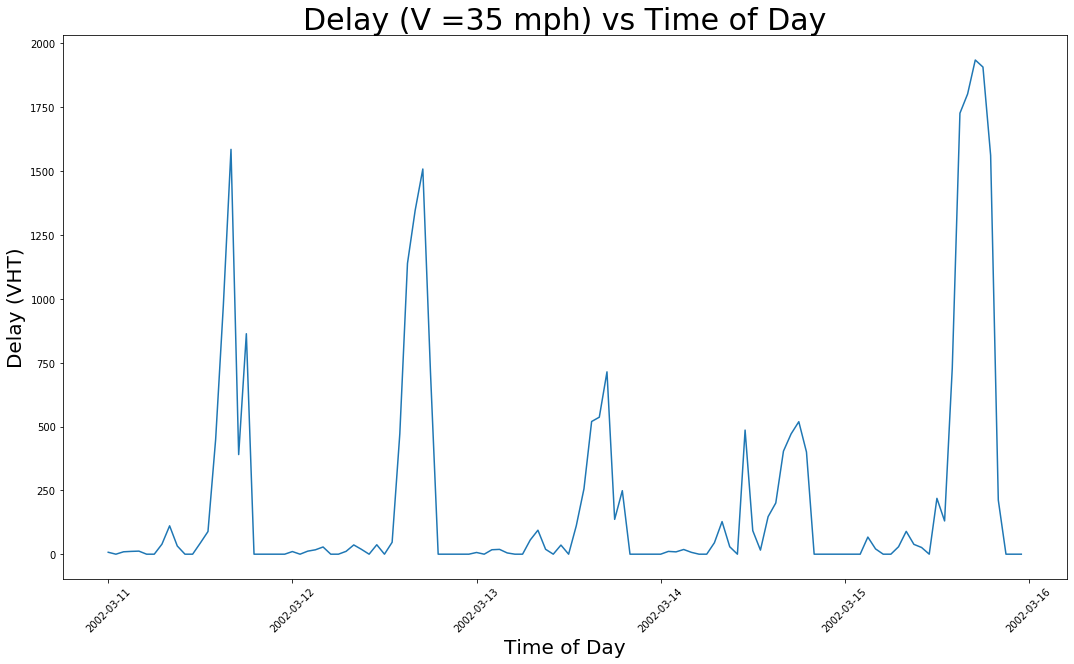

In [346]:
fig, ax = plt.subplots()


plt.plot(dataframe['DATE_TIME'],dataframe['Delay'])

ax.set_title('Delay (V =35 mph) vs Time of Day',size = 30)
ax.set_ylabel('Delay (VHT)', size = 20)
ax.set_xlabel('Time of Day', size =20)
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.xticks(rotation=45)

plt.show()

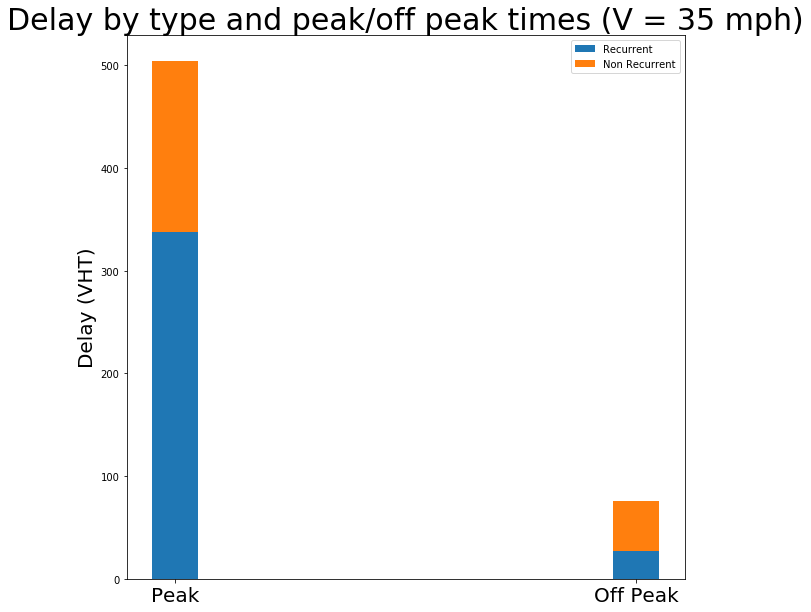

In [347]:
N = 2
menMeans = [recurrent_peak_per_hr,recurrent_off_peak_per_hr ]
womenMeans = [(non_rec_peak_per_hr_acc- recurrent_peak_per_hr)* P_I_is_acc_peak + (non_rec_peak_per_hr_non_acc -recurrent_peak_per_hr)*P_I_is_brk_peak
, (non_rec_off_peak_per_hr_acc- recurrent_off_peak_per_hr)* P_I_is_acc_off_peak + (non_rec_off_peak_per_hr_non_acc -recurrent_off_peak_per_hr)*P_I_is_brk_off_peak]
ind = np.arange(N)    # the x locations for the groups
width = 0.1       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans)

fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.ylabel('Delay (VHT)', size =20)
plt.title('Delay by type and peak/off peak times (V = 35 mph)', size = 30)
plt.xticks(ind, ('Peak', 'Off Peak', 'G3'), size =20)

plt.legend((p1[0], p2[0]), ('Recurrent', 'Non Recurrent'))

plt.show()

In [348]:
print(menMeans[0]/(menMeans[0]+womenMeans[0]))
print(menMeans[1]/(menMeans[1]+womenMeans[1]))

0.6696486102904282
0.3561821040775332


### Part C

In [349]:
# find average travel time:
# Peak -> Incident and Without 
# off Peak -> Incident and Without.

In [350]:
peak['minutes/mile'] = 1/ peak['SPEED'] *60

In [351]:
peak['minutes/mile'].mean()

1.2871882382660629

In [352]:
off_peak['minutes/mile'] = 1/ off_peak['SPEED'] *60

In [353]:
off_peak['minutes/mile'].mean()

0.9903303824131878

In [354]:
peak[ (peak['#ACC'] !=0) | (peak['#BRK'] != 0)]['minutes/mile'].mean()

1.5156716750262287

In [355]:
peak[ (peak['#ACC'] ==0) | (peak['#BRK'] == 0)]['minutes/mile'].mean()

1.2543110874725154

In [356]:
off_peak[ (off_peak['#ACC'] !=0) | (off_peak['#BRK'] != 0)]['minutes/mile'].mean()

1.0429138681181271

In [357]:
off_peak[ (off_peak['#ACC'] ==0) | (off_peak['#BRK'] == 0)]['minutes/mile'].mean()

0.9863554780628871

In [358]:
dataframe['TTI'] = (65/dataframe['SPEED'])

In [359]:
dataframe

,DATE,HRS,SPEED,FLOW,VMT,VHT,#ACC,#BRK,DATE_TIME,Delay,TTI
0,2002-03-11,0,59.6,238.3,12600.7,217.500000,0,0,2002-03-11 00:00:00,7.488333,1.090604
1,2002-03-11,1,60.7,148.9,7800.4,129.000000,0,0,2002-03-11 01:00:00,0.000000,1.070840
2,2002-03-11,2,59.3,131.9,6391.2,115.900000,0,0,2002-03-11 02:00:00,9.380000,1.096121
3,2002-03-11,3,58.1,128.1,5942.2,110.000000,0,0,2002-03-11 03:00:00,10.963333,1.118761
4,2002-03-11,4,58.5,190.3,8893.9,160.200000,0,0,2002-03-11 04:00:00,11.968333,1.111111
5,2002-03-11,5,61.6,355.9,20320.1,338.500000,0,0,2002-03-11 05:00:00,0.000000,1.055195
6,2002-03-11,6,60.8,636.2,35880.7,598.000000,0,0,2002-03-11 06:00:00,0.000000,1.069079
7,2002-03-11,7,58.2,917.6,51509.3,897.700000,0,0,2002-03-11 07:00:00,39.211667,1.116838
8,2002-03-11,8,56.7,926.8,52178.3,980.700000,0,1,2002-03-11 08:00:00,111.061667,1.146384
9,2002-03-11,9,59.8,834.0,46392.6,805.300000,0,0,2002-03-11 09:00:00,32.090000,1.086957


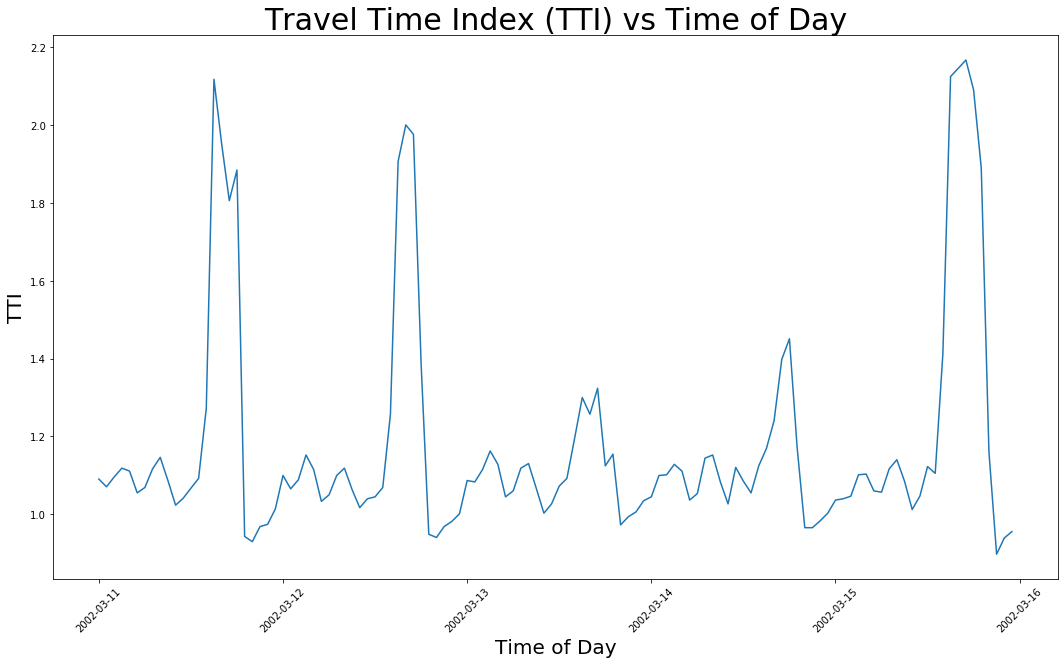

In [360]:
fig, ax = plt.subplots()


plt.plot(dataframe['DATE_TIME'],dataframe['TTI'])

ax.set_title('Travel Time Index (TTI) vs Time of Day',size = 30)
ax.set_ylabel('TTI', size = 20)
ax.set_xlabel('Time of Day', size =20)
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.xticks(rotation=45)

plt.show()

### Part B

In [361]:
HRS = [0,2,4,6,8,10,12,14,16,18,20,22,0,2,4,6,8,10,12,14,16,18,20,22,0,2,4,6,8,10,12,14,16,18,20,22,0,2,4,6,8,10,12,14,16,18,20,22,0,2,4,6,8,10,12,14,16,18,20,22]
speed = []
flow  = []
VMT   = []
VHT   = []
ACC   = []
BRK   = []
DELAY = []


for i in range(0,dataframe.shape[0],2):
  
    speed.append(dataframe['SPEED'][i:i+2].mean())
    flow.append(dataframe['FLOW'][i:i+2].mean())
    VMT.append(dataframe['VMT'][i:i+2].sum())
    VHT.append(dataframe['VHT'][i:i+2].sum())
    ACC.append(dataframe['#ACC'][i:i+2].sum())
    BRK.append(dataframe['#BRK'][i:i+2].sum())
    DELAY.append(dataframe['Delay'][i:i+2].sum())


In [362]:
df = {'SPEED': speed,
     'FLOW': flow,
     'VMT': VMT,
     'VHT': VHT,
     '#ACC':ACC,
     '#BRK':BRK,
     "Delay": DELAY}

In [363]:
df= pd.DataFrame(df)

In [364]:
df['HRS'] = HRS

In [365]:
df.head()

,SPEED,FLOW,VMT,VHT,#ACC,#BRK,Delay,HRS
0,60.15,193.6,20401.1,346.5,0,0,7.488333,0
1,58.70,130.0,12333.4,225.9,0,0,20.343333,2
2,60.05,273.1,29214.0,498.7,0,0,11.968333,4
3,59.50,776.9,87390.0,1495.7,0,0,39.211667,6
4,58.25,880.4,98570.9,1786.0,0,1,143.151667,8


In [366]:
HRS = [1,3,5,7,9,11,13,15,17,19,21,23,1,3,5,7,9,11,13,15,17,19,21,23,1,3,5,7,9,11,13,15,17,19,21,23,1,3,5,7,9,11,13,15,17,19,21,23,1,3,5,7,9,11,13,15,17,19,21,23]
speed = []
flow  = []
VMT   = []
VHT   = []
ACC   = []
BRK   = []
DELAY = []

for i in range(1,dataframe.shape[0],2):
    speed.append(dataframe['SPEED'][i:i+2].mean())
    flow.append(dataframe['FLOW'][i:i+2].mean())
    VMT.append(dataframe['VMT'][i:i+2].sum())
    VHT.append(dataframe['VHT'][i:i+2].sum())
    ACC.append(dataframe['#ACC'][i:i+2].sum())
    BRK.append(dataframe['#BRK'][i:i+2].sum())
    DELAY.append(dataframe['Delay'][i:i+2].sum())
    
df2 = {'SPEED': speed,
     'FLOW': flow,
     'VMT': VMT,
     'VHT': VHT,
     '#ACC':ACC,
     '#BRK':BRK,
      "Delay": DELAY}

In [367]:
df2 = pd.DataFrame(df2)

In [368]:
df2['HRS'] = HRS

In [369]:
am = df[(df['HRS'] == 6) | (df['HRS'] == 8)]
pm = df2[(df2['HRS'] == 15) | (df2['HRS'] == 17)]
peak = pd.concat([am,pm])

In [372]:
peak = pd.concat([am,pm])
peak_wo_incidents = peak[(peak['#ACC'] == 0) & (peak['#BRK'] == 0) ]
peak_w_acc_no_brk = peak[(peak['#ACC'] != 0)]
peak_w_brk_no_acc = peak[(peak['#ACC'] == 0) & (peak['#BRK'] != 0) ]


print(peak.shape)
print(peak_wo_incidents.shape)
print(peak_w_acc_no_brk.shape)
print(peak_w_brk_no_acc.shape)

total_peak_delay             = peak['Delay'].sum()
recurrent_delay_peak         = peak_wo_incidents['Delay'].sum()
non_recurrent_delay_peak_acc = peak_w_acc_no_brk['Delay'].sum()
non_recurrent_delay_peak_brk = peak_w_brk_no_acc['Delay'].sum()

recurrent_peak_per_hr = recurrent_delay_peak/peak_wo_incidents.shape[0]
non_rec_peak_per_hr_acc = non_recurrent_delay_peak_acc/peak_w_acc_no_brk.shape[0]
non_rec_peak_per_hr_non_acc= non_recurrent_delay_peak_brk/peak_w_brk_no_acc.shape[0]
P_I_is_acc_peak =  peak_w_acc_no_brk.shape[0]/peak.shape[0]
P_I_is_brk_peak = peak_w_brk_no_acc.shape[0]/peak.shape[0]

print('Total peak delay per hour =', total_peak_delay/peak.shape[0]/2)
print('Total Recurrent Peak delay per hour', recurrent_peak_per_hr/2)
print('Total Non Recurrent Peak delay (accidents) per hour', (non_rec_peak_per_hr_acc- recurrent_peak_per_hr)* P_I_is_acc_peak/2)
print('Total Non Recurrent AM delay (non_accidents) per hour', (non_rec_peak_per_hr_non_acc -recurrent_peak_per_hr)*P_I_is_brk_peak/2)


(20, 8)
(10, 8)
(7, 8)
(3, 8)
Total peak delay per hour = 504.0838333333333
Total Recurrent Peak delay per hour 319.6598333333333
Total Non Recurrent Peak delay (accidents) per hour 201.27501666666666
Total Non Recurrent AM delay (non_accidents) per hour -16.851016666666673


In [373]:
off_peak1 = dataframe[(dataframe['HRS'] < 6)]
off_peak2 = dataframe[(dataframe['HRS'] > 9)  & (dataframe['HRS'] < 15) ]
off_peak3 = dataframe[(dataframe['HRS'] > 18) & (dataframe['HRS'] < 25) ]

off_peak = pd.concat([off_peak1,off_peak2, off_peak3])

off_peak_wo_incidents = off_peak[(off_peak['#ACC'] == 0) & (off_peak['#BRK'] == 0) ]
off_peak_w_acc_no_brk = off_peak[(off_peak['#ACC'] != 0)]
off_peak_w_brk_no_acc = off_peak[(off_peak['#ACC'] == 0) & (off_peak['#BRK'] != 0) ]

print(off_peak.shape)
print(off_peak_wo_incidents.shape)
print(off_peak_w_acc_no_brk.shape)
print(off_peak_w_brk_no_acc.shape)


total_off_peak_delay             = off_peak['Delay'].sum()
recurrent_delay_off_peak         = off_peak_wo_incidents['Delay'].sum()
non_recurrent_delay_off_peak_acc = off_peak_w_acc_no_brk['Delay'].sum()
non_recurrent_delay_off_peak_brk = off_peak_w_brk_no_acc['Delay'].sum()

recurrent_off_peak_per_hr = recurrent_delay_off_peak/off_peak_wo_incidents.shape[0]
non_rec_off_peak_per_hr_acc = non_recurrent_delay_off_peak_acc/off_peak_w_acc_no_brk.shape[0]
non_rec_off_peak_per_hr_non_acc= non_recurrent_delay_off_peak_brk/off_peak_w_brk_no_acc.shape[0]
P_I_is_acc_off_peak =  off_peak_w_acc_no_brk.shape[0]/off_peak.shape[0]
P_I_is_brk_off_peak = off_peak_w_brk_no_acc.shape[0]/off_peak.shape[0]

print('Total off peak delay per hour = {:0.2f}'.format(total_off_peak_delay/off_peak.shape[0]))
print('Total Recurrent off Peak delay per hour = {:0.2f}'.format( recurrent_off_peak_per_hr))
print('Total Non Recurrent Peak delay (accidents) per hour', (non_rec_off_peak_per_hr_acc- recurrent_off_peak_per_hr)* P_I_is_acc_off_peak)
print('Total Non Recurrent off peak delay (non_accidents) per hour', (non_rec_off_peak_per_hr_non_acc - recurrent_off_peak_per_hr)*P_I_is_brk_off_peak)

(80, 11)
(61, 11)
(7, 11)
(12, 11)
Total off peak delay per hour = 76.18
Total Recurrent off Peak delay per hour = 27.13
Total Non Recurrent Peak delay (accidents) per hour 42.04662568306011
Total Non Recurrent off peak delay (non_accidents) per hour 7.00087021857924


### Old Code

In [331]:
print('Total AM delay per hour =', total_am_delay/am.shape[0])
recurrent_am_per_hr = recurrent_delay_am/am_wo_incidents.shape[0]
non_rec_am_per_hr_acc = non_recurrent_delay_am_acc/am_w_acc_no_brk.shape[0]
non_rec_am_per_hr_non_acc= non_recurrent_delay_am_brk/am_w_brk_no_acc.shape[0]
P_I_is_acc_am =  am_w_acc_no_brk.shape[0]/am.shape[0]
P_I_is_brk_am = am_w_brk_no_acc.shape[0]/am.shape[0]

print('Total Recurrent AM delay per hour', recurrent_am_per_hr)
print('Total Non Recurrent AM delay (accidents) per hour', (non_rec_am_per_hr_acc- recurrent_am_per_hr)* P_I_is_acc_am)
print('Total Non Recurrent AM delay (non_accidents) per hour', (non_rec_am_per_hr_non_acc -recurrent_am_per_hr)*P_I_is_brk_am )


NameError: name 'total_am_delay' is not defined

In [295]:
print('Total AM delay per hour =', total_pm_delay/pm.shape[0])

recurrent_pm_per_hr = recurrent_delay_pm/pm_wo_incidents.shape[0]
non_rec_pm_per_hr_acc = non_recurrent_delay_pm_acc/pm_w_acc_no_brk.shape[0]
non_rec_pm_per_hr_non_acc= non_recurrent_delay_pm_brk/pm_w_brk_no_acc.shape[0]
P_I_is_acc_pm =  pm_w_acc_no_brk.shape[0]/pm.shape[0]
P_I_is_brk_pm = pm_w_brk_no_acc.shape[0]/pm.shape[0]

print('Total Recurrent PM delay per hour', recurrent_pm_per_hr)
print('Total Non Recurrent PM delay (accidents) per hour', (non_rec_pm_per_hr_acc - recurrent_pm_per_hr)* P_I_is_acc_pm)
print('Total Non Recurrent PM delay (non_accidents) per hour', (non_rec_pm_per_hr_non_acc - recurrent_pm_per_hr)*P_I_is_brk_pm)

NameError: name 'total_pm_delay' is not defined